https://competitions.desights.ai/challenge/31

# Data Reading, Imports

In [89]:
#Set your Imports
import os
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import matplotlib.transforms as mtrans
from summary import summary_summary

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Add the project root to sys.path
notebook_dir = os.path.dirname(os.path.abspath('F1.ipynb'))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(notebook_dir)

races_dir = "races_2024/"
sing_qual_dir = "singapore_grand_prix_qualifyings_2018-2019-2022-2023/"
sing_races_dir = "singapore_grand_prix_races_2018-2019-2022-2023/"

In [90]:
skip = ["position_2O24.csv", "circuit_2024.csv"]

races = []
sing_qual = []
sing_races = []

# with os.scandir(notebook_dir + "/" + races_dir) as it:
#     for entry in it:
#         if entry.name.endswith(".csv") and entry.is_file():
#             if entry.name in skip:
#                 races.append((None, None))
#                 continue
#             print(entry.name, entry.path)
#             races.append((entry.name, pd.read_csv(entry.path)))

# with os.scandir(notebook_dir + "/" + sing_qual_dir) as it:
#     for entry in it:
#         if entry.name.endswith(".csv") and entry.is_file():
#             if entry.name in skip: continue
#             print(entry.name, entry.path)
#             sing_qual.append((entry.name, pd.read_csv(entry.path)))

# with os.scandir(notebook_dir + "/" + sing_races_dir) as it:
#     for entry in it:
#         if entry.name.endswith(".csv") and entry.is_file():
#             if entry.name in skip: continue
#             print(entry.name, entry.path)
#             sing_races.append((entry.name, pd.read_csv(entry.path)))

In [91]:
# for l in [races, sing_qual, sing_races]:
#     for idx, df in enumerate(l):
#         print()
#         print("**" + df[0] + "**", idx, "\\")
#         print(' -- '.join(df[1].columns))

In [92]:
# races[1][1].iloc[50000:50020]
# races[6][1].head(20)
# races[8][1][races[8][1]["Driver"] == "VER"].iloc[0]

Intro \
Data \
* EDA
    * Totals
        * Pit stops, total
        * Pit stops per team, total
        * Pit stops per driver, total
        * Tire compounds used, total
        * Tire compounds used per team, total
        * Tire compounds used per driver, total
        * Num laps completed on each compound, total / per driver / per team
        * Avg lap time per stint, total / per driver / per team
        * Delta time per tire compound, total / per driver / per team
        * Time spent in pits total / per driver / per team
    * Per race
        * Pit stops total for this race / this team / this driver
        
    

## Columns & File descriptions

### 2024

**weather_2024.csv** 0 \
EventName -- Time -- AirTemp -- Humidity -- Pressure -- Rainfall -- TrackTemp -- WindDirection -- WindSpeed

**position_2O24.csv** 1 \
EventName -- DriverName -- Date -- Status -- X -- Y -- Z -- Source -- Time -- SessionTime

**control_message_2024.csv** 2 \
EventName -- Time -- Category -- Message -- Status -- Flag -- Scope -- Sector -- RacingNumber -- Lap

**result_2024.csv** 3 \
EventName -- DriverNumber -- BroadcastName -- Abbreviation -- DriverId -- TeamName -- TeamColor -- TeamId -- FirstName -- LastName -- FullName -- HeadshotUrl -- CountryCode -- Position -- ClassifiedPosition -- GridPosition -- Q1 -- Q2 -- Q3 -- Time -- Status -- Points

**circuit_2024.csv** 4 \
EventName -- TrackMarker -- X -- Y -- Number -- Letter -- Angle -- Distance

**car_data_2024.csv** 5 \
EventName -- DriverName -- Date -- RPM -- Speed -- nGear -- Throttle -- Brake -- DRS -- Source -- Time -- SessionTime

**session_status_2024.csv** 6 \
EventName -- Time -- Status

**track_status_2024.csv** 7 \
EventName -- Time -- Status -- Message

**lap_2024.csv** 8 \
EventName -- Time -- Driver -- DriverNumber -- LapTime -- LapNumber -- Stint -- PitOutTime -- PitInTime -- Sector1Time -- Sector2Time -- Sector3Time -- Sector1SessionTime -- Sector2SessionTime -- Sector3SessionTime -- SpeedI1 -- SpeedI2 -- SpeedFL -- SpeedST -- IsPersonalBest -- Compound -- TyreLife -- FreshTyre -- Team -- LapStartTime -- LapStartDate -- TrackStatus -- Position -- Deleted -- DeletedReason -- FastF1Generated -- IsAccurate


In [93]:
weather_raw = pd.read_csv("races_2024/weather_2024.csv")
#positions_raw = pd.read_csv("races_2024/position_2O24.csv")
control_msg_raw = pd.read_csv("races_2024/control_message_2024.csv")
results_raw = pd.read_csv("races_2024/result_2024.csv")
#circuits_raw = pd.read_csv("races_2024/circuit_2024.csv")
car_data_raw = pd.read_csv("races_2024/car_data_2024.csv")
session_status_raw = pd.read_csv("races_2024/session_status_2024.csv")
track_status_raw = pd.read_csv("races_2024/track_status_2024.csv")
laps_raw = pd.read_csv("races_2024/lap_2024.csv")

### Singapore 2018-2023

**weather_singapore_grand_prix_2018-2019-2022-2023.csv** 0 \
Year -- Time -- AirTemp -- Humidity -- Pressure -- Rainfall -- TrackTemp -- WindDirection -- WindSpeed

**circuit_singapore_grand_prix_2018-2019-2022-2023.csv** 1 \
Year -- TrackMarker -- X -- Y -- Number -- Letter -- Angle -- Distance

**position_singapore_grand_prix_2018-2019-2022-2023.csv** 2 \
Year -- DriverName -- Date -- Status -- X -- Y -- Z -- Source -- Time -- SessionTime

**car_data_singapore_grand_prix_2018-2019-2022-2023.csv** 3 \
Year -- DriverName -- Date -- RPM -- Speed -- nGear -- Throttle -- Brake -- DRS -- Source -- Time -- SessionTime

**lap_singapore_grand_prix_2018-2019-2022-2023.csv** 4 \
Year -- Time -- Driver -- DriverNumber -- LapTime -- LapNumber -- Stint -- PitOutTime -- PitInTime -- Sector1Time -- Sector2Time -- Sector3Time -- Sector1SessionTime -- Sector2SessionTime -- Sector3SessionTime -- SpeedI1 -- SpeedI2 -- SpeedFL -- SpeedST -- IsPersonalBest -- Compound -- TyreLife -- FreshTyre -- Team -- LapStartTime -- LapStartDate -- TrackStatus -- Position -- Deleted -- DeletedReason -- FastF1Generated -- IsAccurate

**track_status_singapore_grand_prix_2018-2019-2022-2023.csv** 5 \
Year -- Time -- Status -- Message

**result_singapore_grand_prix_2018-2019-2022-2023.csv** 6 \
Year -- DriverNumber -- BroadcastName -- Abbreviation -- DriverId -- TeamName -- TeamColor -- TeamId -- FirstName -- LastName -- FullName -- HeadshotUrl -- CountryCode -- Position -- ClassifiedPosition -- GridPosition -- Q1 -- Q2 -- Q3 -- Time -- Status -- Points

**session_status_singapore_grand_prix_2018-2019-2022-2023.csv** 7 \
Year -- Time -- Status

**control_message_singapore_grand_prix_2018-2019-2022-2023.csv** 8 \
Year -- Time -- Category -- Message -- Status -- Flag -- Scope -- Sector -- RacingNumber -- Lap

**weather_singapore_grand_prix_2018-2019-2022-2023.csv** 0 \
Year -- Time -- AirTemp -- Humidity -- Pressure -- Rainfall -- TrackTemp -- WindDirection -- WindSpeed

**circuit_singapore_grand_prix_2018-2019-2022-2023.csv** 1 \
Year -- TrackMarker -- X -- Y -- Number -- Letter -- Angle -- Distance

**position_singapore_grand_prix_2018-2019-2022-2023.csv** 2 \
Year -- DriverName -- Date -- Status -- X -- Y -- Z -- Source -- Time -- SessionTime

**car_data_singapore_grand_prix_2018-2019-2022-2023.csv** 3 \
Year -- DriverName -- Date -- RPM -- Speed -- nGear -- Throttle -- Brake -- DRS -- Source -- Time -- SessionTime

**lap_singapore_grand_prix_2018-2019-2022-2023.csv** 4 \
Year -- Time -- Driver -- DriverNumber -- LapTime -- LapNumber -- Stint -- PitOutTime -- PitInTime -- Sector1Time -- Sector2Time -- Sector3Time -- Sector1SessionTime -- Sector2SessionTime -- Sector3SessionTime -- SpeedI1 -- SpeedI2 -- SpeedFL -- SpeedST -- IsPersonalBest -- Compound -- TyreLife -- FreshTyre -- Team -- LapStartTime -- LapStartDate -- TrackStatus -- Position -- Deleted -- DeletedReason -- FastF1Generated -- IsAccurate

**track_status_singapore_grand_prix_2018-2019-2022-2023.csv** 5 \
Year -- Time -- Status -- Message

**result_singapore_grand_prix_2018-2019-2022-2023.csv** 6 \
Year -- DriverNumber -- BroadcastName -- Abbreviation -- DriverId -- TeamName -- TeamColor -- TeamId -- FirstName -- LastName -- FullName -- HeadshotUrl -- CountryCode -- Position -- ClassifiedPosition -- GridPosition -- Q1 -- Q2 -- Q3 -- Time -- Status -- Points

**session_status_singapore_grand_prix_2018-2019-2022-2023.csv** 7 \
Year -- Time -- Status

**control_message_singapore_grand_prix_2018-2019-2022-2023.csv** 8 \
Year -- Time -- Category -- Message -- Status -- Flag -- Scope -- Sector -- RacingNumber -- Lap

# Data Cleaning

In [94]:
def parse_laptime_ymdhms(series): # Str-printable format
    result = []
    # 1900-01-01 00:41:18.944000000
    
    for item in series:
        item = str(item)
        if item == "nan":
            result.append(np.nan)
        else:
            item = item.split(" ")[1].split(".")
            item[0] = item[0][3:]
            item[1] = item[1][:4]
            item = '.'.join(item)
            
            result.append(item)
    return result
        

In [95]:
summary_summary(laps_raw)

,unique,null,dtypes,dupe,outliers,count,mean,std,min,max
Deleted,2,0,bool,0,,,,,,
FastF1Generated,2,0,bool,0,,,,,,
FreshTyre,2,0,bool,0,,,,,,
IsAccurate,2,0,bool,0,,,,,,
TrackStatus,21,0,int64,0,135,17123,6.3227,63.4643,1.0000,2671.0000
DriverNumber,21,0,int64,0,0,17123,27.7856,23.9351,1.0000,81.0000
TyreLife,78,0,float64,0,167,17123,14.8040,11.8374,1.0000,78.0000
Position,20,15,float64,0,0,17108,9.9174,5.5015,1.0000,20.0000
SpeedFL,221,571,float64,0,146,16552,268.8545,26.2710,1.0000,330.0000
SpeedI1,262,2759,float64,0,132,14364,256.4988,41.5246,65.0000,357.0000


In [105]:
# Laps
laps_raw["Stint"] = laps_raw["Stint"].astype(int)


# Exploratory Data Analysis

In [106]:
laps_raw

,EventName,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,Bahrain Grand Prix,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0000,1,NaN,NaN,NaN,...,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0000,False,NaN,False,False
1,Bahrain Grand Prix,0 days 01:03:13.806000,VER,1,0 days 00:01:36.296000,2.0000,1,NaN,NaN,0 days 00:00:30.916000,...,False,Red Bull Racing,0 days 01:01:37.510000,2024-03-02 15:05:19.941,1,1.0000,False,NaN,False,True
2,Bahrain Grand Prix,0 days 01:04:50.559000,VER,1,0 days 00:01:36.753000,3.0000,1,NaN,NaN,0 days 00:00:30.999000,...,False,Red Bull Racing,0 days 01:03:13.806000,2024-03-02 15:06:56.237,1,1.0000,False,NaN,False,True
3,Bahrain Grand Prix,0 days 01:06:27.206000,VER,1,0 days 00:01:36.647000,4.0000,1,NaN,NaN,0 days 00:00:30.931000,...,False,Red Bull Racing,0 days 01:04:50.559000,2024-03-02 15:08:32.990,1,1.0000,False,NaN,False,True
4,Bahrain Grand Prix,0 days 01:08:04.379000,VER,1,0 days 00:01:37.173000,5.0000,1,NaN,NaN,0 days 00:00:31.255000,...,False,Red Bull Racing,0 days 01:06:27.206000,2024-03-02 15:10:09.637,1,1.0000,False,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17118,Dutch Grand Prix,0 days 02:23:52.192000,ZHO,24,0 days 00:01:15.737000,66.0000,3,NaN,NaN,0 days 00:00:25.857000,...,True,Kick Sauber,0 days 02:22:36.455000,2024-08-25 14:28:13.093,1,20.0000,False,NaN,False,True
17119,Dutch Grand Prix,0 days 02:25:07.916000,ZHO,24,0 days 00:01:15.724000,67.0000,3,NaN,NaN,0 days 00:00:25.746000,...,True,Kick Sauber,0 days 02:23:52.192000,2024-08-25 14:29:28.830,1,20.0000,False,NaN,False,True
17120,Dutch Grand Prix,0 days 02:26:25.673000,ZHO,24,0 days 00:01:17.757000,68.0000,3,NaN,NaN,0 days 00:00:26.736000,...,True,Kick Sauber,0 days 02:25:07.916000,2024-08-25 14:30:44.554,1,20.0000,False,NaN,False,True
17121,Dutch Grand Prix,0 days 02:27:41.538000,ZHO,24,0 days 00:01:15.865000,69.0000,3,NaN,NaN,0 days 00:00:25.980000,...,True,Kick Sauber,0 days 02:26:25.673000,2024-08-25 14:32:02.311,1,20.0000,False,NaN,False,True


Explore the data thoroughly, uncovering key patterns and insights that can inform race strategies. For each team and driver, analyze the following and support your findings with relevant visuals:

## Total Number of Pit Stops
For each driver and team in each race of the 2024 F1 season, determine the total number of pit stops made. Identify any patterns or trends in pit stop frequency.

https://www.formula1.com/en/results/2024/races/1231/australia/race-result \
https://www.formula1.com/en/video/race-highlights-2024-australian-grand-prix.1794387578890217636

* Read laps data
* Read results data
    * Merge laps (lefton: EventName, Driver) with results (righton:EventName, Abbreviation, data: ClassifiedPosition)
* Filter out drivers where pos == "R"



* Establish base df pitstops_df
    *  Grab PIT || POT not null, sort by Driver / Event Name / Time
* Calculate Total number of pit stops per individual
    * Groupby Event & Driver - select Event/Driver/PitInTime != null - agg count
    * Each Event/Driver will have a number, call it PitStopsPerIndividual
        * Merge pitstops_df on this new frame (lefton: Event/Driver, righton: Event/Driver)
* Calculate Delta between lap times
    * Should just be that timediff thing pandas has
* Calculate Delta between lap numbers
    * Same thing
* Calculate Pit Time Delta
    * Same thing

* Team pit stops, Total
    * Pit Stop Data - Group by Team, select Team/Driver/EventName/PitStopsPerIndividual - sum that group
* Driver pit stops, Total
    * Pit Stop Data - Group by Driver, select Driver/EventName/PitStopsPerIndividual - sum that group
* Per race (for loop through races)
    * Team pit stops, bar chart
        * Pit Stop Data - Groupby Team - select Team/Driver/PitStopsPerIndividual - sum that group
        * Team1 XXXXXXXX
        * Team2 XXXXXX
        * Team3 XXXXXXXXXXXX
    * Driver pit stops, bar chart
        * Pit Stop Data - Groupby Driver - select Driver/PitStopsPerIndividual - sum that group (probably no gb needed)
        * Same as above
* Patterns and trends in pit stop frequency
    * Grab PIT || POT not null, sort by Driver / Event Name / Time
    * Lap Number Delta - find avg laps between pit stops
    * Pit Time Delta - find avg time between pit stops
    * Lap Time Delta - find avg time between laps w/ pit stops. Compare to pit time delta

In [107]:
# Here's an example of VER DNF on this particular race - ClassifiedPosition = "R"
results[results["EventName"] == "Australian Grand Prix"].tail(5)

,EventName,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
54,Australian Grand Prix,24,G ZHOU,ZHO,zhou,Kick Sauber,52e252,sauber,Guanyu,Zhou,...,CHN,15.0000,15,19.0000,NaN,NaN,NaN,NaN,+1 Lap,0.0000
55,Australian Grand Prix,31,E OCON,OCO,ocon,Alpine,0093cc,alpine,Esteban,Ocon,...,FRA,16.0000,16,15.0000,NaN,NaN,NaN,NaN,+1 Lap,0.0000
56,Australian Grand Prix,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,...,GBR,17.0000,17,7.0000,NaN,NaN,NaN,NaN,Accident,0.0000
57,Australian Grand Prix,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,...,GBR,18.0000,R,11.0000,NaN,NaN,NaN,NaN,Engine,0.0000
58,Australian Grand Prix,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,...,NED,19.0000,R,1.0000,NaN,NaN,NaN,NaN,Brakes,0.0000


In [108]:
# PitInTime / PitOutTime != Null
laps_raw[laps_raw["Driver"] == "VER"][(laps_raw["PitInTime"].notna()) | (laps_raw["PitOutTime"].notna())] \
    [["Time", "EventName", "Driver", "Team", "LapTime", "LapNumber", "Stint", "PitInTime", "PitOutTime", "Compound"]].sort_values(["EventName", "Time"]).head(30)

,Time,EventName,Driver,Team,LapTime,LapNumber,Stint,PitInTime,PitOutTime,Compound
2033,0 days 01:04:24.613000,Australian Grand Prix,VER,Red Bull Racing,NaN,4.0000,1,0 days 01:04:24.613000,NaN,MEDIUM
11441,0 days 01:22:42.731000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:14.679000,23.0000,1,0 days 01:22:39.342000,NaN,MEDIUM
11442,0 days 01:24:10.125000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:27.394000,24.0000,2,NaN,0 days 01:23:01.443000,HARD
11469,0 days 01:55:46.519000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:13.860000,51.0000,2,0 days 01:55:43.269000,NaN,HARD
11470,0 days 01:57:18.104000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:31.585000,52.0000,3,NaN,0 days 01:56:09.187000,MEDIUM
11482,0 days 02:11:39.650000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:38.003000,64.0000,3,0 days 02:11:36.305000,NaN,MEDIUM
11483,0 days 02:13:13.347000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:33.697000,65.0000,4,NaN,0 days 02:11:59.048000,SOFT
16,0 days 01:27:31.985000,Bahrain Grand Prix,VER,Red Bull Racing,0 days 00:01:39.896000,17.0000,1,0 days 01:27:30.291000,NaN,SOFT
17,0 days 01:29:29.839000,Bahrain Grand Prix,VER,Red Bull Racing,0 days 00:01:57.854000,18.0000,2,NaN,0 days 01:27:55.379000,HARD
36,0 days 01:59:49.512000,Bahrain Grand Prix,VER,Red Bull Racing,0 days 00:01:39.234000,37.0000,2,0 days 01:59:47.796000,NaN,HARD


In [109]:
# Slice of some laps before and after a pit stop
laps_raw.iloc[11464:11474][["Time", "EventName", "Driver", "Team", "LapTime", "LapNumber", "Stint", "PitInTime", "PitOutTime", "Compound"]].sort_values(["EventName", "Time"])

,Time,EventName,Driver,Team,LapTime,LapNumber,Stint,PitInTime,PitOutTime,Compound
11464,0 days 01:49:50.360000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.288000,46.0000,2,NaN,NaN,HARD
11465,0 days 01:51:01.018000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.658000,47.0000,2,NaN,NaN,HARD
11466,0 days 01:52:11.378000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.360000,48.0000,2,NaN,NaN,HARD
11467,0 days 01:53:21.921000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.543000,49.0000,2,NaN,NaN,HARD
11468,0 days 01:54:32.659000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.738000,50.0000,2,NaN,NaN,HARD
11469,0 days 01:55:46.519000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:13.860000,51.0000,2,0 days 01:55:43.269000,NaN,HARD
11470,0 days 01:57:18.104000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:31.585000,52.0000,3,NaN,0 days 01:56:09.187000,MEDIUM
11471,0 days 01:58:26.876000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:08.772000,53.0000,3,NaN,NaN,MEDIUM
11472,0 days 01:59:35.665000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:08.789000,54.0000,3,NaN,NaN,MEDIUM
11473,0 days 02:00:44.878000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:09.213000,55.0000,3,NaN,NaN,MEDIUM


In [110]:
laps_raw.iloc[11478:11487][["Time", "EventName", "Driver", "Team", "LapTime", "LapNumber", "Stint", "PitInTime", "PitOutTime", "Compound"]].sort_values(["EventName", "Time"])

,Time,EventName,Driver,Team,LapTime,LapNumber,Stint,PitInTime,PitOutTime,Compound
11478,0 days 02:06:31.704000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:09.399000,60.0000,3,NaN,NaN,MEDIUM
11479,0 days 02:07:41.707000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.003000,61.0000,3,NaN,NaN,MEDIUM
11480,0 days 02:08:51.235000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:09.528000,62.0000,3,NaN,NaN,MEDIUM
11481,0 days 02:10:01.647000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.412000,63.0000,3,NaN,NaN,MEDIUM
11482,0 days 02:11:39.650000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:38.003000,64.0000,3,0 days 02:11:36.305000,NaN,MEDIUM
11483,0 days 02:13:13.347000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:33.697000,65.0000,4,NaN,0 days 02:11:59.048000,SOFT
11484,0 days 02:14:37.066000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:23.719000,66.0000,4,NaN,NaN,SOFT
11485,0 days 02:15:48.757000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:11.691000,67.0000,4,NaN,NaN,SOFT
11486,0 days 02:16:56.476000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:07.719000,68.0000,4,NaN,NaN,SOFT


In [111]:
laps_raw.iloc[9]

EventName                  Bahrain Grand Prix
Time                   0 days 01:16:09.722000
Driver                                    VER
DriverNumber                                1
LapTime                0 days 00:01:36.960000
LapNumber                             10.0000
Stint                                       1
PitOutTime                                NaN
PitInTime                                 NaN
Sector1Time            0 days 00:00:30.986000
Sector2Time            0 days 00:00:42.009000
Sector3Time            0 days 00:00:23.965000
Sector1SessionTime     0 days 01:15:03.748000
Sector2SessionTime     0 days 01:15:45.757000
Sector3SessionTime     0 days 01:16:09.722000
SpeedI1                              232.0000
SpeedI2                              244.0000
SpeedFL                              277.0000
SpeedST                              293.0000
IsPersonalBest                          False
Compound                                 SOFT
TyreLife                          

## Tire Compounds Used During the Race
Identify the tire compounds used by each driver in every race. Create visualizations to compare the tire compound strategies across different teams and drivers.

* Team Tire compositions, Total (# of laps used with a type of tire)
    * Laps data - group by Team - select Team/Event/Driver/LapValue/Compound - Val Count Graph of Compound
* Driver Tire compositions, Total (# of laps used with a type of tire)
    * Laps data - group by Driver - select Driver/Event/LapValue/Compound - Value count Graph of Compound
* Per Race (for loop through races)
    * Team Tire compositions, horizontal stacked bar graph
        * Laps data - group by Team - Select Team/Driver/LapCount/Compound - Value count of Compound
        * Team1 XXXyyyyyyyyZZZZ
        * Team2 XXXXXXyyyyZZZZZ
    * Driver Tire compositions, horizontal stacked bar graph
        * Laps data - group by Driver - select Driver/LapCount/Compound - Value count of Compound
        * Driver1 XXXyyyyyyyZZZZ
        * Driver2 XyyyyyyZZZZZZZ

In [112]:
laps_raw.iloc[0]

EventName                  Bahrain Grand Prix
Time                   0 days 01:01:37.510000
Driver                                    VER
DriverNumber                                1
LapTime                0 days 00:01:37.284000
LapNumber                              1.0000
Stint                                       1
PitOutTime                                NaN
PitInTime                                 NaN
Sector1Time                               NaN
Sector2Time            0 days 00:00:41.266000
Sector3Time            0 days 00:00:23.616000
Sector1SessionTime                        NaN
Sector2SessionTime     0 days 01:01:13.987000
Sector3SessionTime     0 days 01:01:37.669000
SpeedI1                              234.0000
SpeedI2                              250.0000
SpeedFL                              276.0000
SpeedST                              251.0000
IsPersonalBest                          False
Compound                                 SOFT
TyreLife                          

## Number of Laps Completed on Each Tire Compound
Analyze the number of laps completed by each driver on each tire compound during their stints. Use visuals to illustrate the relationship between stint length and tire compound usage.

* Lap data - Group by Driver - select Driver/Event/LapNumber/Compound - value count of each driver
    * Total Compound usage per driver for all races
    * Driver1 aaaBBBBcccDDeeeeeeeeeeeFFgggggggg
* Driver compound usage per stint
    * Driver1
        * Stint 1 xxxxyyyyyzzzz
        * Stint 2 xxyyyyyzzzzzz
    * Driver2
        * Stint 1 ...
        * Stint 2 ...
    AND
    * Driver1
        * Compound1 - 25 laps
        * Compound2 - 32 laps

In [113]:
# Driver compound usage count
laps = laps_raw[["Time", "EventName", "Driver", "Team", "LapNumber", "Stint", "Compound"]]
lapsg = laps.groupby(["Driver", "Compound"]).count().reset_index()
lapsg.head(10).rename(columns={"Time":"Count"})[["Driver", "Compound", "Count"]]

,Driver,Compound,Count
0,ALB,HARD,472
1,ALB,INTERMEDIATE,55
2,ALB,MEDIUM,229
3,ALB,SOFT,73
4,ALO,HARD,390
5,ALO,INTERMEDIATE,55
6,ALO,MEDIUM,380
7,ALO,SOFT,86
8,BEA,HARD,43
9,BEA,SOFT,7


In [114]:
# Driver total compound usage on each stint
# Number of laps in a stint broken down by compound usage
lapsgg = laps.groupby(["Driver", "Stint", "Compound"]).count().reset_index()
lapsgg[lapsgg["Driver"] == "VER"].rename(columns={"Time":"Count"})[["Driver", "Stint", "Compound", "Count"]]

,Driver,Stint,Compound,Count
229,VER,1,HARD,1
230,VER,1,INTERMEDIATE,25
231,VER,1,MEDIUM,179
232,VER,1,SOFT,34
233,VER,2,HARD,265
234,VER,2,INTERMEDIATE,32
235,VER,2,MEDIUM,93
236,VER,3,HARD,73
237,VER,3,MEDIUM,93
238,VER,3,SOFT,42


## Average Lap Time per Stint and Delta Time per Tire Compound
Calculate the average lap time for each stint. Visualize the changes in lap times within each stint to understand how tire performance evolved over the course of a race.

* Average Lap Time Per Stint
    * Laps data - 

In [115]:
laps = laps_raw[["Time", "EventName", "Driver", "Team", "LapNumber", "LapTime", "Stint", "Compound"]]
laps.set_index(["Stint"]).head(20)

# timeDF=(pd.to_datetime(cleanDF['Running-Time'].str.strip(), format='%H:%M:%S'))
times = []
for t in laps["LapTime"]:
    if type(t) == type("s"):
        a = t.split(" ")[2]
        if "." not in a:
            a += ".000000"
        times.append(a)
    else:
        times.append(np.nan)
laps["LapTime"] = pd.to_datetime(times, format='%H:%M:%S.%f')

# Average laps per stint
laps[["Stint", "LapNumber"]].groupby(["Stint"]).mean()

,LapNumber
Stint,
1,11.3888
2,32.3665
3,46.5665
4,47.1781
5,48.6788


<Axes: title={'center': 'Lap Time Averages Over Time'}, xlabel='Stint', ylabel='Sec'>

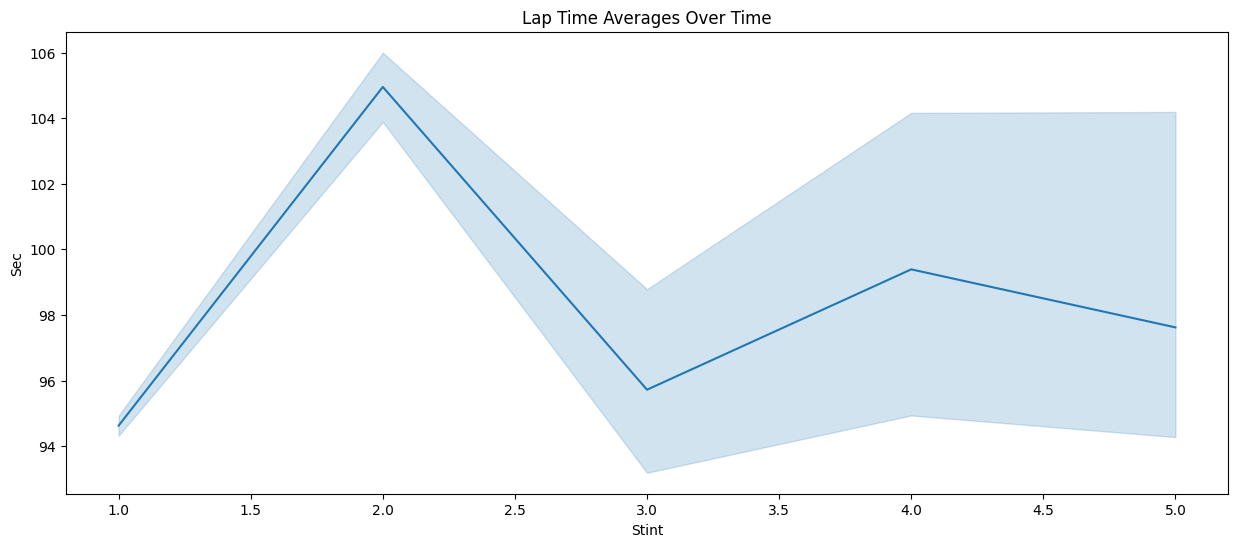

In [116]:
# British Grand Prix / Belgian Grand Prix / Austrian Grand Prix
lapsg = laps[laps["EventName"] == "British Grand Prix"][["Driver", "Stint", "LapTime"]].groupby(["Driver", "Stint"]).mean().reset_index()
# lapsg = lapsg[lapsg["Driver"] == "VER"]
lapsg["Sec"] = (lapsg['LapTime'].dt.minute * 60) + lapsg["LapTime"].dt.second + (lapsg["LapTime"].dt.microsecond / 1000000)
# lapsg.style.format({"LapTime": lambda t: t.strftime("%H:%M:%S.%f")})
# lapsg[lapsg["Driver"] == "VER"]
lapsg = lapsg[["Driver", "Stint", "Sec"]]
# lapsg.head(20)

# Graph the data
fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title("Lap Time Averages Over Time")

# lapsg = lapsg[~lapsg["Driver"].isin(["LEC", "HUL", "MAG", "OCO", "PER"])]
# lapsg = lapsg[lapsg["Stint"] >= 2]

sns.lineplot(data=lapsg, x="Stint", y="Sec", ax=ax)

In [126]:
# Average Lap Times of Stints, Per Compound
# Delta time per tire compound between stints
# lapsg = laps[laps["Driver"] != "VER"]
# lapsg.style.format({"LapTime": lambda t: t.strftime("%H:%M:%S.%f")})
# lapsg["LapTime"] = pd.to_datetime(lapsg['LapTime'].astype(str), format='%H:%M:%S.%f')

lapsg = laps[["Compound", "Stint", "LapTime"]].groupby(["Compound", "Stint"]).mean()
lapsg["LapTime"] = parse_laptime_ymdhms(lapsg["LapTime"])
print(lapsg.reset_index())

# Also need to do one within a single stint
# Also need to do this per driver and merge it on the base dataframe per driver

        Compound  Stint     LapTime
0           HARD      1  02:10.4927
1           HARD      2  01:27.7174
2           HARD      3  01:29.8809
3           HARD      4  01:36.1367
4           HARD      5  01:41.9179
5   INTERMEDIATE      1  01:33.3951
6   INTERMEDIATE      2  01:38.5500
7   INTERMEDIATE      3  01:39.0455
8   INTERMEDIATE      4  01:40.5161
9         MEDIUM      1  01:36.2590
10        MEDIUM      2  01:26.3932
11        MEDIUM      3  01:27.1345
12        MEDIUM      4  01:30.8100
13        MEDIUM      5  01:22.2675
14          SOFT      1  01:31.0362
15          SOFT      2  01:32.2838
16          SOFT      3  01:27.5928
17          SOFT      4  01:28.4352
18          SOFT      5  01:37.0725
19           WET      1  01:39.3794


In [138]:
lapsg = laps[["Driver", "Stint", "LapTime"]].groupby(["Driver", "Stint"]).mean().reset_index().head(20)
lapsg#.style.format({"LapTime": lambda t: t.strftime("%H:%M:%S.%f")})
lapsg["LapTime"] = parse_laptime_ymdhms(lapsg["LapTime"])
lapsg.set_index("Driver")

,Stint,LapTime
Driver,,
ALB,1,01:46.4625
ALB,2,01:28.7669
ALB,3,01:29.1780
ALB,4,01:30.5131
ALB,5,01:23.2325
ALO,1,01:41.9816
ALO,2,01:28.7552
ALO,3,01:27.5936
ALO,4,01:36.6889


In [119]:
lapsg = laps[["Driver", "LapTime"]].groupby(["Driver"]).mean().reset_index().head(20)
lapsg["LapTime"] = parse_laptime_ymdhms(lapsg["LapTime"])
lapsg = lapsg.set_index("Driver")
lapsg

,LapTime
Driver,
ALB,01:32.2674
ALO,01:31.9387
BEA,01:36.0482
BOT,01:31.9780
GAS,01:32.2477
HAM,01:31.5130
HUL,01:30.2317
LEC,01:31.0552
MAG,01:30.5806


## Time Spent in Pits
Measure the total time spent in the pits by each driver during the races. Create visual representations to show how pit time varies across drivers and teams.